Общее число отличников: 23368
Лучшая школа Москвы: Федеральное государственное автономное образовательное учреждение высшего образования «Национальный исследовательский университет» Высшая школа экономики». лицей Национального исследовательского университета» Высшая школа экономики»


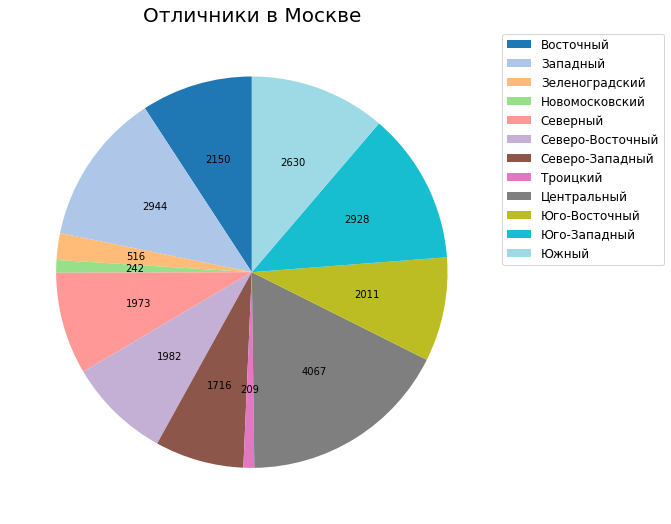

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


(221, b'2.0.0 closing connection f18sm2743750lfc.12 - gsmtp')

In [1]:
%matplotlib inline
import pandas as pd
import binascii
import pdfkit
from jinja2 import Template
import matplotlib.pyplot as plt
import smtplib
from email import encoders
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart

data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter = ";")
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
data = data[data["YEAR"] == "2018-2019"]
data1 = data.groupby("AdmArea").sum()["PASSES_OVER_220"].reset_index()
total = sum(data1["PASSES_OVER_220"])
print("Общее число отличников:", total)
pd.options.display.max_colwidth = 1000
best_school = data[data["PASSES_OVER_220"] == data.max()["PASSES_OVER_220"]]["EDU_NAME"].iloc[0]
print("Лучшая школа Москвы:", best_school)

fig = plt.figure(figsize=(16, 9))
area = fig.add_subplot(1, 1, 1)
area.set_title("Отличники в Москве", fontsize=20)
data1["PASSES_OVER_220"].plot.pie(ax = area, labels=[""]*len(data["PASSES_OVER_220"]), label="", 
                                  cmap="tab20", autopct=lambda x: int(round(total * x/100)), startangle=90)
area.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12, labels=data1["AdmArea"])
plt.savefig("best_area.png")
plt.show()
with open('best_area.png', 'rb') as file:
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")
html = '''<html>
<head>
    <title>Лучшие школы и ученики Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Общее число отличников в Москве: ''' + str(total) + '''</h1>
    <img src="''' + img + '''"alt="Отличники по округам"/>
    <h2>Лучшая школа Москвы: ''' + best_school + '''</h2>
</body>
</html>'''
with open ("best_school.html", "w", encoding="utf-8") as file:
    file.write(html)
config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, "best_school.pdf",
                  configuration=config, options = options)
letter = MIMEMultipart()
letter["From"] = "User1"
letter["Subject"] = "Лучшие школы Москвы"
letter["Content-Type"] = "text/html; charset=utf-8"
letter["To"] = "User2"
letter.attach(MIMEText(open("best_school.html", "r",
                           encoding="UTF-8").read(), 'html'))
attachement = MIMEBase('application', 'pdf')
attachement.set_payload(open('best_school.pdf', 'rb').read())            
attachement.add_header('Content-Disposition',
                      'attachement; filename="best_school.pdf"')
encoders.encode_base64(attachement)
letter.attach(attachement)
user = "XXX"
password = "XXX"
server = smtplib.SMTP_SSL("smtp.gmail.com", 465)
server.login(user, password)
server.sendmail("USER1@gmail.com", "USER2@yandex.ru", letter.as_string())
server.quit()
